In [1]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
print(cwd)

/scratch/cs/infantbiome/huy


In [2]:
df = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv')
df = df.iloc[:,1:]
plot = pd.read_csv('./06_XBP1_result/WT/plot_WT.csv')
plot = plot.iloc[:,1:]
data = pd.read_csv('./results/STAR/WT_arrange.csv')
out_dir = "./06_XBP1_result/WT/circadian_genes"
data_type ="WT"

In [3]:
df[(df.LLR >-1)&(df.Period==24)].index.values

array([   5,    8,   18, ..., 4308, 4318, 4320])

In [ ]:
import matplotlib.patches as mpatches
from core import *
from scipy.signal import find_peaks

plt_index = df[(df.LLR >-1)&(df.Period==24)].index.values #Pick an index

for x in plt_index: 
    gene  = np.array(data.iloc[x,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_null = Parameters()
    param_null.p = plot['Period_null'][x]
    param_null.l = plot['Lengthscale_null'][x]
    param_null.sigma_f2 = plot['Var_null'][x]
    param_null.sigma_n2 = plot['Noise_null'][x]

    param_GP = Parameters()
    param_GP.p = plot['Period'][x]
    param_GP.l = plot['Lengthscale'][x]
    param_GP.sigma_f2 = plot['Var'][x]
    param_GP.sigma_n2 = plot['Noise'][x]


    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Null model of GP")


    plt.subplot(1, 2, 2)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    mean_f = final_pse.cal_pred_mu(new_pse).detach().numpy().flatten()
    peaks, _ = find_peaks(mean_f, distance = param_GP.p.item())
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.plot(peaks, mean_f[peaks], "x")
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Circadian detection model with GP")

    plt.suptitle(f"Expression of gene {data.iloc[x,0]}",fontsize=20)
    red_patch = mpatches.Patch(color='red',label= f'SNR = {round(df.SNR[x],2)}; nSNR = {round(df.nSNR[x],2)}; LLR = {round(df.LLR[x],2)}')
    blue_patch = mpatches.Patch(color='blue', label= f'sigma_f2 = {round(param_GP.sigma_f2.item(),2)}; sigma_n2 = {round(param_GP.sigma_n2.item(),2)}')
    yellow_patch = mpatches.Patch(color='yellow', label = f'period = {param_GP.p.item()}; phase = {peaks[0]}')
    plt.legend(handles=[red_patch, blue_patch, yellow_patch])
    #plt.show()
    plt.savefig(f"{out_dir}/gene{x}_{data_type}.png")

print("done")


In [4]:
# Load data
import matplotlib.patches as mpatches 
from core import * 
from scipy.signal import find_peaks

Adr = pd.read_csv('./02_Atlas_result/Adr/GP_result_Adr.csv')
Adr = Adr.iloc[:,1:]

Aor = pd.read_csv('./02_Atlas_result/Aor/GP_result_Aor.csv')
Aor = Aor.iloc[:,1:]

BFat = pd.read_csv('./02_Atlas_result/BFat/GP_result_BFat.csv')
BFat = BFat.iloc[:,1:]

Bstm = pd.read_csv('./02_Atlas_result/Bstm/GP_result_Bstm.csv')
Bstm = Bstm.iloc[:,1:]

Cer = pd.read_csv('./02_Atlas_result/Cer/GP_result_Cer.csv')
Cer = Cer.iloc[:,1:]

Hrt = pd.read_csv('./02_Atlas_result/Hrt/GP_result_Hrt.csv')
Hrt = Hrt.iloc[:,1:]

Hyp = pd.read_csv('./02_Atlas_result/Hyp/GP_result_Hyp.csv')
Hyp = Hyp.iloc[:,1:]

Kid = pd.read_csv('./02_Atlas_result/Kid/GP_result_Kid.csv')
Kid = Kid.iloc[:,1:]

Liv = pd.read_csv('./02_Atlas_result/Liv/GP_result_Liv.csv')
Liv = Liv.iloc[:,1:]

Lun = pd.read_csv('./02_Atlas_result/Lun/GP_result_Lun.csv')
Lun = Lun.iloc[:,1:]

Mus = pd.read_csv('./02_Atlas_result/Mus/GP_result_Mus.csv')
Mus = Mus.iloc[:,1:]

WFat = pd.read_csv('./02_Atlas_result/WFat/GP_result_WFat.csv')
WFat = WFat.iloc[:,1:]

# Report on Circadian and Non-circadian genes (proportion on the whole sample)

# Atlas data
Taken the RNA_seq one instead of the micro-assay one so that there is less timepoint as a whole. Using directly via STAR output

--------------------------------------------------------------------------------
- Adrenal gland (Adr):

Total number of genes Adr is 13429 whereas circadian genes comprise of 2187 

Thus 16.29% circadian with 72.29% (1581) of the genes are periodic with positive LLR

- Aorta (Aor):

Total number of genes Aor is 12979 whereas circadian genes comprise of 2421 

Thus 18.65% circadian with 14.33% (347) of the genes are periodic with positive LLR

- Brown Fat (BFat):

Total number of genes Aor is 12300 whereas circadian genes comprise of 3378 

Thus 27.46% circadian with 20.4% (689) of the genes are periodic with positive LLR

- Brain stem (Bstm):

Total number of genes Bstm is 13976 whereas circadian genes comprise of 2406

Thus 17.26% circadian with 6.07% (146) of the genes are periodic with positive LLR

- Cerebellum (Cer):

Total number of genes Cer is 13449 whereas circadian genes comprise of 1419 

Thus 10.51% circadian with 15.64% (222) of the genes are periodic with positive LLR

- Heart (Hrt):

Total number of genes Hrt is 12612 whereas circadian genes comprise of 3628 

Thus 28.77% circadian with 19.98% (725) of the genes are periodic with positive LLR

- Hypothalamus (Hyp):

Total number of genes Hyp is 13946 whereas circadian genes comprise of 2139 

Thus 15.34% circadian with 8.32% (178) of the genes are periodic with positive LLR

- Kidney (Kid):

Total number of genes Kid is 13167 whereas circadian genes comprise of 3236 

Thus 24.58% circadian with 24.29% (786) of the genes are periodic with positive LLR

- Liver (Liv):

Total number of genes Liv is 12067 whereas circadian genes comprise of 3473 

Thus 28.78% circadian with 20.9% (726) of the genes are periodic with positive LLR

- Lung (Lun):

Total number of genes Lun is 13798 whereas circadian genes comprise of 2410 

Thus 17.47% circadian with 15.35% (370) of the genes are periodic with positive LLR

- Skeletal muscle (Mus):

Total number of genes Mus is 12294 whereas circadian genes comprise of 2946 

Thus 23.96% circadian with 14.94% (440) of the genes are periodic with positive LLR

- White Fat (WFat):

Total number of genes WFat is 12793 whereas circadian genes comprise of 2073 

Thus 16.2% circadian with 5.02% (104) of the genes are periodic with positive LLR

--------------------------------------------------------------------------------

From this literature, 

We want to compare # of circadian genes detected among organs; (Done)

Histogram on the phases; (Done)

Check shared circadian genes with other organs; (Done)

Display characteristics of these types of genes (superismosed, antiphases, pathway activator,...)

See whether there exist core circadian genes from other papers (BMAL1,CLOCK,PER,..) (Done)

Evaluation the accuracy of the period(MSE)/phase(estimate from the ground truth)



# Phase analysis

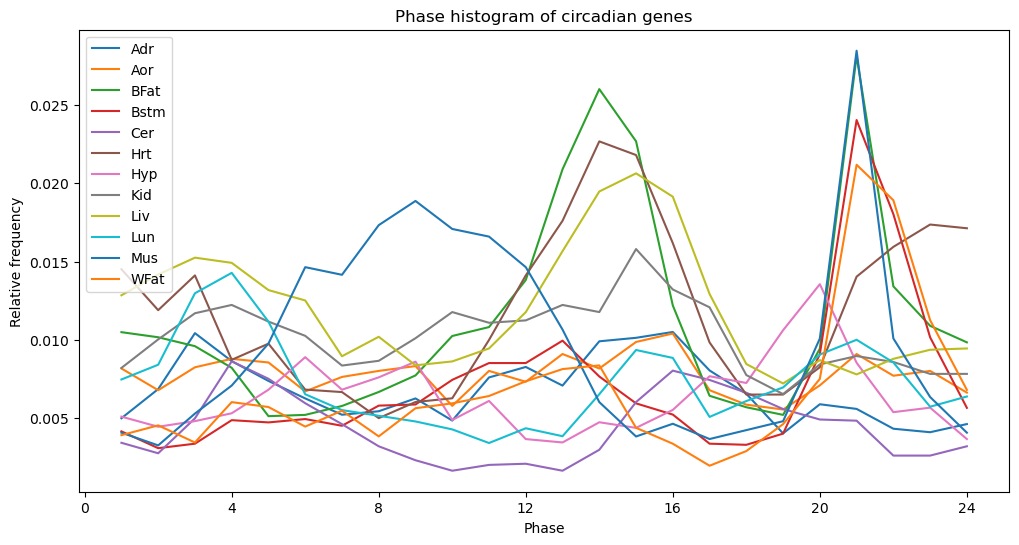

[array([ 3, 16]),
 array([ 4, 16]),
 array([21]),
 array([ 6, 21]),
 array([ 4, 16]),
 array([ 3, 14]),
 array([ 6, 20]),
 array([ 4, 15]),
 array([ 3, 15]),
 array([ 4, 21]),
 array([ 9, 21]),
 array([ 4, 21])]

In [5]:
import matplotlib.pyplot as plt

organs = [Adr,Aor,BFat,Bstm,Cer,Hrt,Hyp,Kid,Liv,Lun,Mus,WFat]
label = ['Adr','Aor','BFat','Bstm','Cer','Hrt','Hyp','Kid','Liv','Lun','Mus','WFat']
pk = []

fig = plt.figure(figsize=(12,6))
for i in range(len(organs)): 
    sys = organs[i]
    data = sys[sys.Period == 24]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 10)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label[i])

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of circadian genes')
plt.show()

pk

[array([ 4, 16]),
 array([ 6, 16]),
 array([ 2, 13]),
 array([14]),
 array([ 4, 17]),
 array([ 3, 15]),
 array([ 7, 20]),
 array([ 6, 16]),
 array([ 4, 14]),
 array([ 4, 16]),
 array([ 8, 21]),
 array([ 9, 21])]

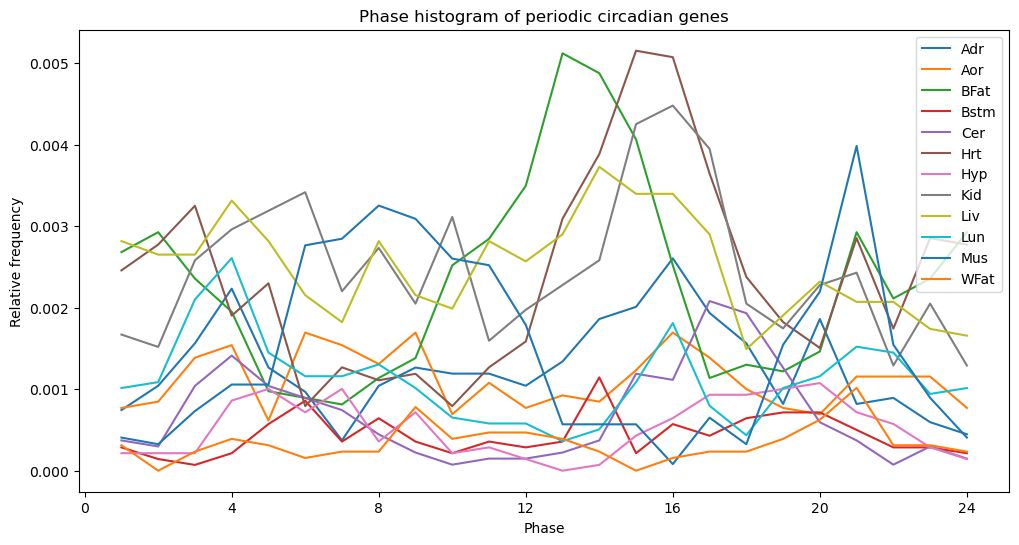

In [6]:
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(organs)): 
    sys = organs[i]
    data = sys[(sys.Period == 24)&(sys.LLR >0)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 10)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of periodic circadian genes')

pk

Text(0.5, 1.0, 'Phase histogram of all genes')

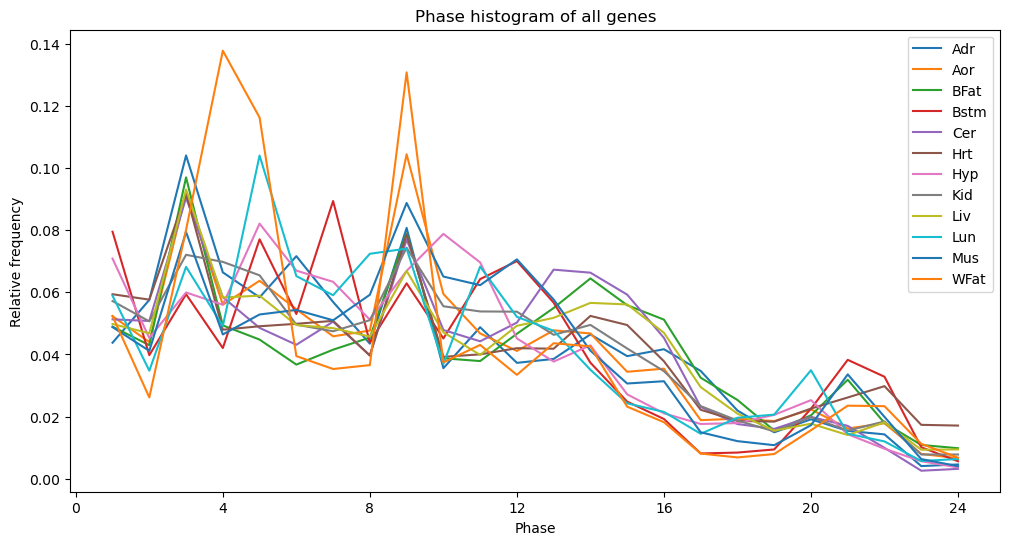

In [7]:
import matplotlib.pyplot as plt

#organs = [Adr,Aor,BFat,Cer,Hrt,Hyp,Kid,Liv,Lun,Mus,WFat]
#label = ['Adr','Aor','BFat','Cer','Hrt','Hyp','Kid','Liv','Lun','Mus','WFat']
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(organs)): 
    sys = organs[i]
    data = sys
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 10)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of all genes')


# Comment:
Interestingly, for every organ seems like there are 2 phases that have the highest relative frequencies of circadian genes and they are antiphased (differences by 12h - already have the report for this or another theory is the ammount of sleeping time). Meaning that this might prove our theory of inhibition and excitation of the cycle. When we take in account of all genes, the distribution kinda skewed to the smaller phase in a sense there are mixture of smaller periodic rhythm and their phase cannot be higher than their period thus resulting to this skew. 

# Period 

Text(0.5, 1.0, 'Period histogram of all genes')

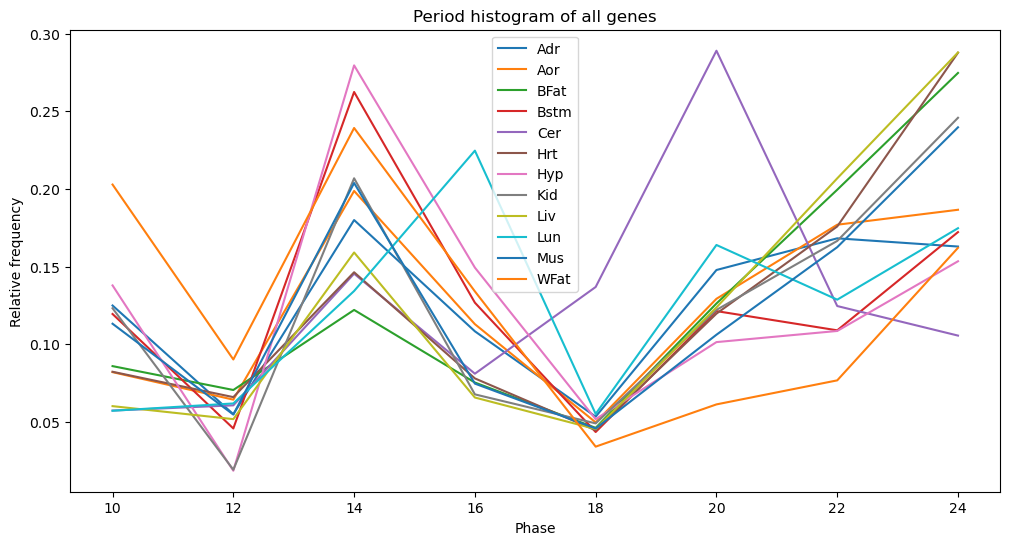

In [8]:
fig = plt.figure(figsize=(12,6))
for i in range(len(organs)): 
    sys = organs[i]
    data = sys
    signal = []
    for j in range(10,25,2):
        signal.append(len(data[data.Period == j].index.values)/len(sys))
    
    plt.plot(range(10,25,2),signal,label = label[i])
    

plt.legend()
plt.xticks([10,12,14,16,18,20,22,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Period histogram of all genes')

# Comment:

We can see that 24h genes takes majority but so too the 14h periodicity have the same proportion which is interesting, since we hypothesize 12h as our main research but this is might due to the interval problem of 6 that making the prediction of 12h periodicity seems not reasonable. Might fact check this one since the literature does not commend on the 12h component. For the ranking of circadian organs, the plot I yield resembles to that of the literature as well. I test for both 24 and 14 and interestingly the component seems to swap place.

- Kid, BFat, Hrt, Liv (Highest); Cer, Hyp, WFat, Adr (Lowest); (24h)
- Mus, Kid, WFat, BStm, Hyp (Highest); BFat, Cer, Lun, Hrt (Lowest); (14h)

Weirdly, Lun has most 16h periodicity rhythm while Cer is 20h periodicity rhythm

Text(0.5, 1.0, 'Rank of the most circadian organs with Per24')

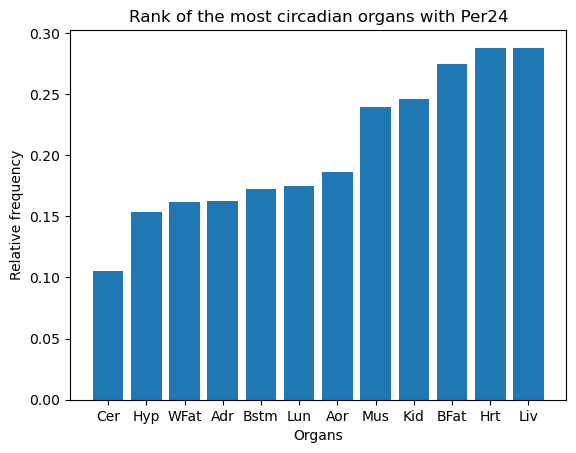

In [9]:
# Rank the circadian organs:
y = []
for i in organs:
    y.append(len(i[i.Period == 24])/len(i))

df = pd.DataFrame(
   dict(
      organs=label,
      rel_freq=y
   )
)
plt.bar('organs', 'rel_freq', data = df.sort_values('rel_freq'))
plt.xlabel('Organs')
plt.ylabel('Relative frequency')
plt.title('Rank of the most circadian organs with Per24')

Text(0.5, 1.0, 'Rank of the most circadian organs with Per14')

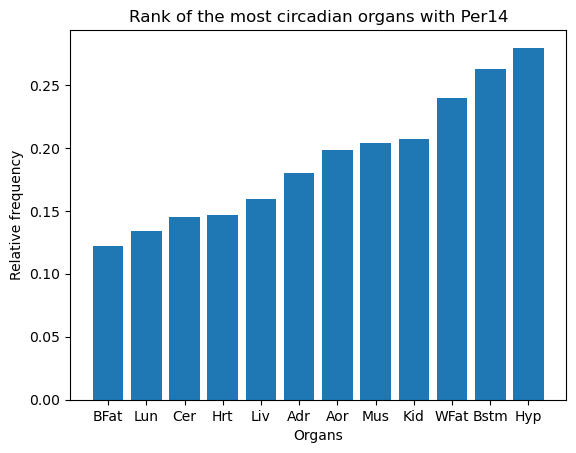

In [10]:
y = []
for i in organs:
    y.append(len(i[i.Period == 14])/len(i))

df = pd.DataFrame(
   dict(
      organs=label,
      rel_freq=y
   )
)
plt.bar('organs', 'rel_freq', data = df.sort_values('rel_freq'))
plt.xlabel('Organs')
plt.ylabel('Relative frequency')
plt.title('Rank of the most circadian organs with Per14')

In [11]:
# Get shared circadian genes
circadian = []
for k in organs:
    circadian.append(k[(k.LLR > 0)& (k.Period == 24)])

for a in range(len(circadian)-1):
    for b in range(a+1,len(circadian)):
        print('Shared circadian genes between '+label[a]+' and '+label[b]+' are:')
        x = circadian[a]
        y = circadian[b]
        list_1 = x['Gene.ID'].values
        list_2 = y['Gene.ID'].values
        similar = np.intersect1d(list_1, list_2)
        print(similar)
        print('Total: ',len(similar))
        print('-----')

Shared circadian genes between Adr and Aor are:
['Ahsa1' 'Anxa5' 'Armcx5' 'Arsg' 'Borcs7' 'Cdc25b' 'Cldn5' 'Cmtm6'
 'Col5a3' 'Cys1' 'Dsn1' 'Fkbp4' 'Fus' 'Gm12346' 'H2bc21' 'Hif1an'
 'Hsp90aa1' 'Hsp90ab1' 'Hspa8' 'Hsph1' 'Lox' 'Naa60' 'Nkain1' 'Pcsk4'
 'Rev1' 'Rorc' 'Serpinh1' 'Slc43a3' 'Snx24' 'Stip1' 'Tmem140' 'Trim65'
 'Tubd1']
Total:  33
-----
Shared circadian genes between Adr and BFat are:
['Abhd6' 'Ahsa1' 'Angptl2' 'Apln' 'Bbln' 'Bicd2' 'Borcs7' 'Cc2d1a' 'Cd200'
 'Cdc25b' 'Col4a1' 'Col4a2' 'Col5a3' 'Cry1' 'Cys1' 'Dsn1' 'Fkbp4' 'Fmo2'
 'Gm5844' 'Helz2' 'Hif1an' 'Hnrnpdl' 'Hoxc5' 'Hsd17b11' 'Hsp90ab1' 'Hspa8'
 'Hsph1' 'Ift140' 'Irf2bp2' 'Kif3a' 'Klhl8' 'Lox' 'Mkks' 'Naa60' 'Nkain1'
 'Pigv' 'Rorc' 'Serp1' 'Serpinh1' 'St6galnac2' 'Stip1' 'Tmem33' 'Tnip2'
 'Trim65' 'Ube2i' 'Yap1' 'Zscan25']
Total:  47
-----
Shared circadian genes between Adr and Bstm are:
['Apln' 'Ccdc66' 'Dbp' 'Hsph1' 'Lypd6' 'P4ha1' 'Sdc4' 'Sytl2' 'Tef'
 'Tmem100' 'Tubd1']
Total:  11
-----
Shared circadian genes bet

In [12]:
# Rank most common circadian genes:
from functools import reduce
from collections import Counter
circa_genes = [j['Gene.ID'].values for j in circadian]
out = np.concatenate(circa_genes).ravel()
rank = Counter(out)
rank.most_common(30)

[('Hsph1', 8),
 ('Rorc', 7),
 ('Stip1', 7),
 ('Cry1', 7),
 ('Cys1', 7),
 ('Hsp90ab1', 7),
 ('Hspa8', 6),
 ('Dbp', 6),
 ('Ahsa1', 6),
 ('P4ha1', 6),
 ('Gm5844', 6),
 ('Wee1', 6),
 ('Bmal1', 6),
 ('Col5a3', 5),
 ('Arsg', 5),
 ('Gm10167', 5),
 ('Trim65', 5),
 ('Hsp90aa1', 5),
 ('Apln', 5),
 ('Fmo2', 5),
 ('Naa60', 5),
 ('Dtx4', 5),
 ('Per3', 5),
 ('Baz1b', 5),
 ('Nfil3', 5),
 ('Gm20634', 5),
 ('P4ha2', 5),
 ('Lonrf1', 5),
 ('Per2', 5),
 ('Nr1d1', 4)]

# Comment:

We could see that by the total number of shared circadian genes throughout the organ is vast and some are shared within many other organs. Some of the most notable classic circadian genes are found in high freq for example Rorc, Cry1, BMal1, Dbp, Per2, and so on. This tighten our theory on the circadian system. We can draw the system of how they interact with each other if that might be the case as well. But now we acknowledge the presence of shared component with multiple organs. 

# Evaluation of accuracy

Actually, this sounds a bit confusing in a sense that

- MSE toward ground truth? So from JTK/Rain?
- Direct estimate the phase? I actually forgot this is it the maximum? 

# Refine of LLR

Get the result from JTK/Rain and then merge the result then plot them side by side with 80% cut off. But remember to check the acceptance threshold from both JTK and Rain

--------------------------------------------------------------------------------

# Simulated data

- Circadian signal:

- Non-circadian signal:

-----------------------------------------------------------------------------
# XBP1 data (Liver-extracted)

- Knock-out XBP1 (KO): Total of 4666 genes where 2764 of them (59.24%) are found circadian with a periodic rate of 9.73%; for 12h there are 726 genes (15.56%) but none of them above the LLR positive threshold

- Wild-type (WT): Total of 4338 genes where 2290 of them (52.79%) are found circadian with a periodic rate of 14.85%, for 12h there are 592 genes (13.34%) and there are 5 of them are periodic

Comment:

- It s strange that 12h from KO is larger than 12h from WT which kinda contradicts with the paper (Maybe if we use the proper threshold this may hold)

- A 16h rhythmicity arises as well, and may look at that at later time.

- 3->15 / 4->14 phase peak in liver (from the Atlas) but not correspond well with phase here in XBP1 with phase from 2->8->15->23 (WT, periodic circadian genes)

- Need to comapre with the literature about the 12h periodicity and see why this contradicts a lot

- In need to make a pair-pair with JTK cycle and Rain 

In [5]:
KO = pd.read_csv('./06_XBP1_result/KO/GP_result_KO.csv') #4666/2764/269 (24)   726/0 (12)
KO = KO.iloc[:,1:]

WT = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv') #4338/2290/340 (24)   592/5 (12)
WT = WT.iloc[:,1:]

Text(0.5, 1.0, 'Period histogram of all genes')

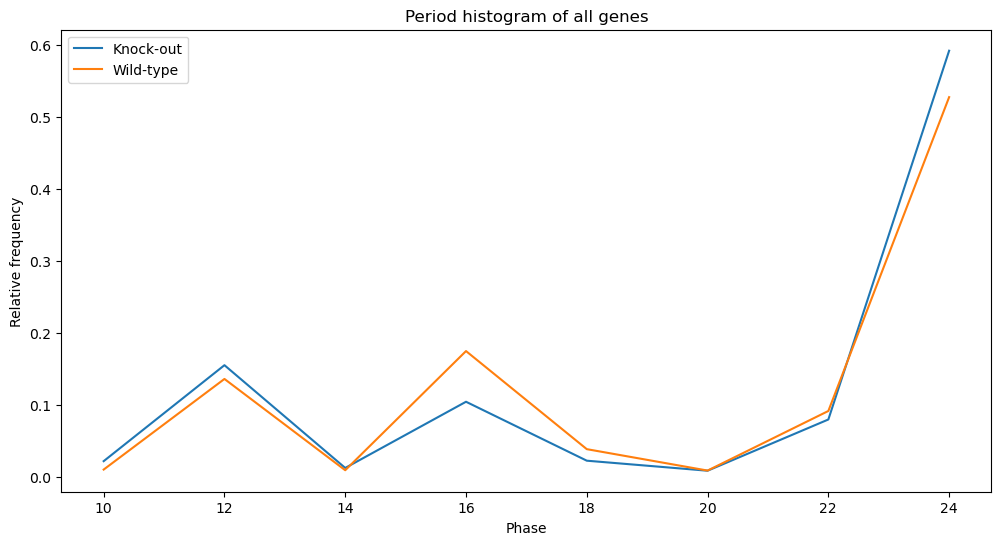

In [14]:
xbp = [KO,WT]
label_2 = ['Knock-out','Wild-type']
fig = plt.figure(figsize=(12,6))
for i in range(len(xbp)): 
    sys = xbp[i]
    data = sys
    signal = []
    for j in range(10,25,2):
        signal.append(len(data[data.Period == j].index.values)/len(sys))
    
    plt.plot(range(10,25,2),signal,label = label_2[i])
    

plt.legend()
plt.xticks([10,12,14,16,18,20,22,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Period histogram of all genes')

[array([12]), array([ 8, 18])]

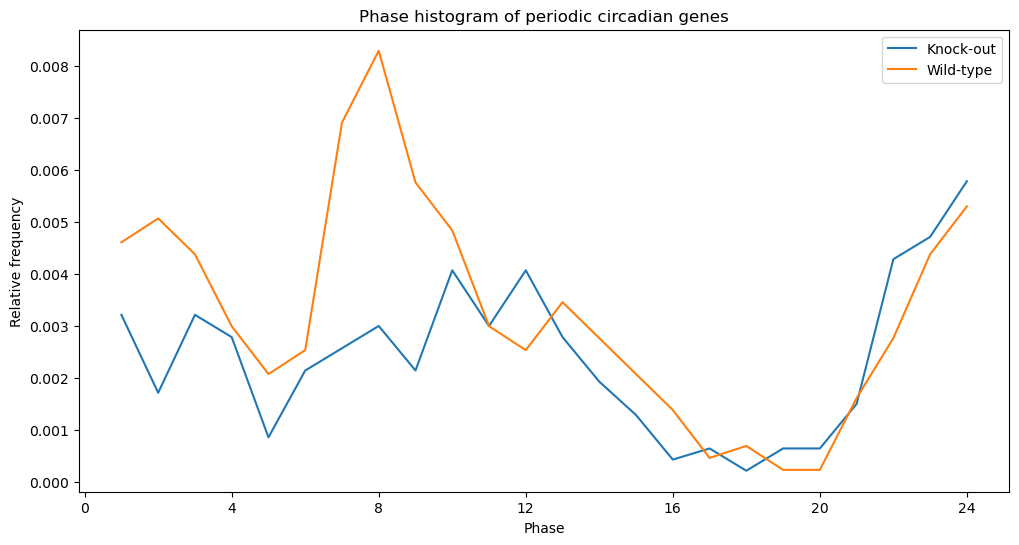

In [15]:
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(xbp)): 
    sys = xbp[i]
    data = sys[(sys.Period ==24)&(sys.LLR>0)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 10)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label_2[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of periodic circadian genes')

pk

In [16]:
len(WT[(WT.Period ==24) & (WT.phase ==24)].index.values)

126

[array([ 8, 14, 23]), array([ 8, 15])]

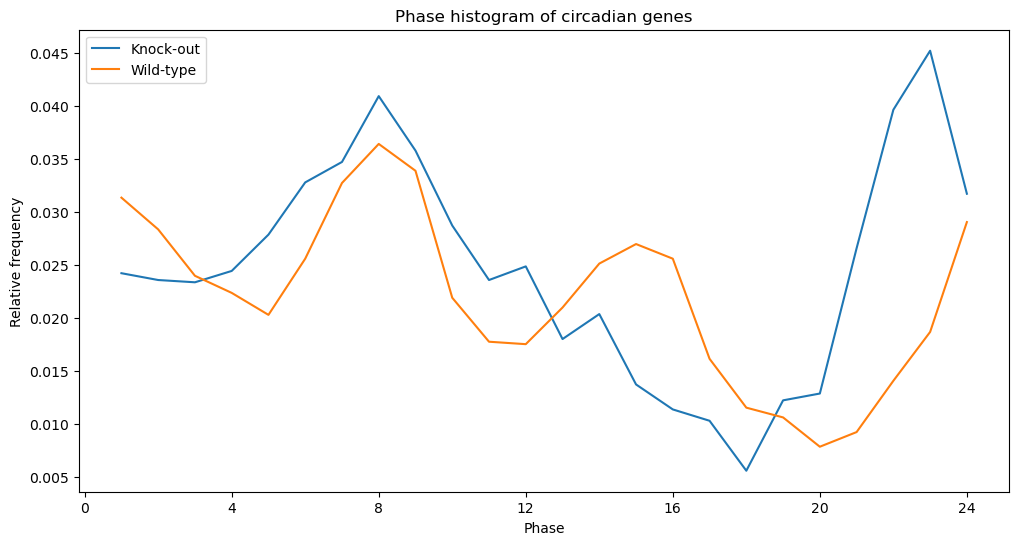

In [17]:
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(xbp)): 
    sys = xbp[i]
    data = sys[(sys.Period ==24)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 5)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label_2[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of circadian genes')

pk

[array([ 2,  8, 16, 23]), array([ 9, 16])]

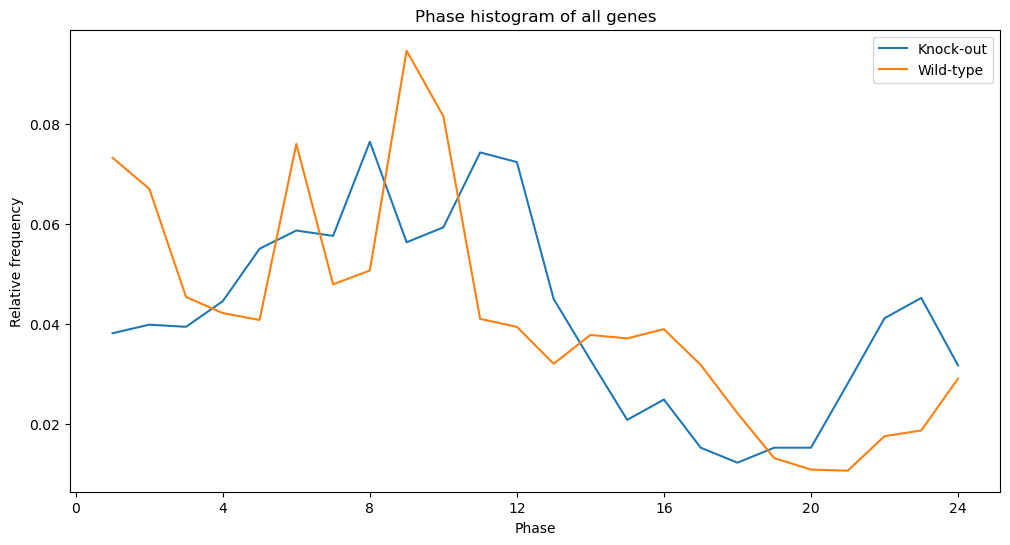

In [18]:
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(xbp)): 
    sys = xbp[i]
    data = sys
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 5)
    pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label_2[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of all genes')

pk

[array([2, 6, 8]), array([ 6, 10])]

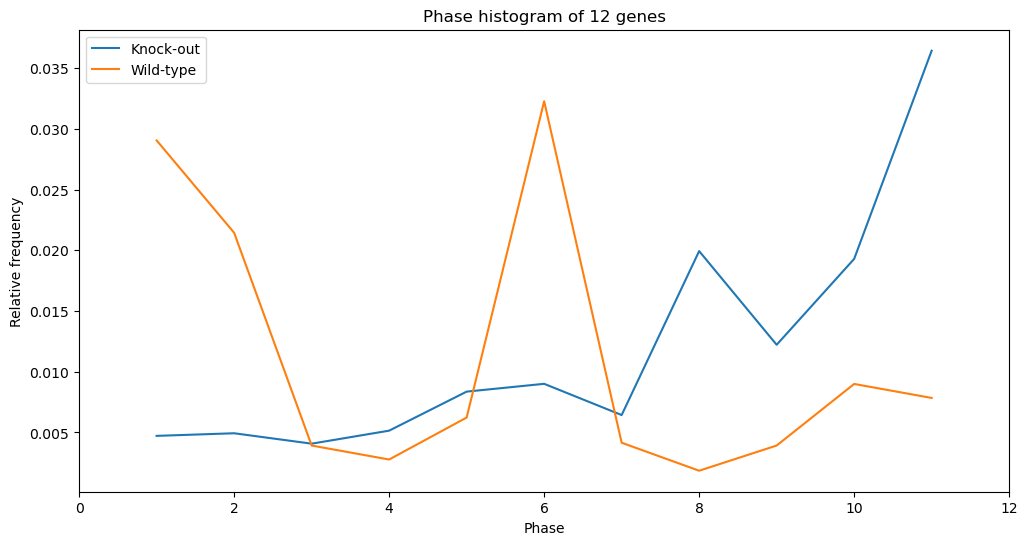

In [19]:
pk =[]
fig = plt.figure(figsize=(12,6))
for i in range(len(xbp)): 
    sys = xbp[i]
    data = sys[(sys.Period ==12)]
    signal = []
    for j in range(1,12):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    peaks, _ = find_peaks(signal,distance = 2)
    pk.append(peaks + 1)
    plt.plot(range(1,12),signal,label = label_2[i])
    

plt.legend()
plt.xticks([0,2,4,6,8,10,12])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of 12 genes')

pk

In [20]:
#Similar for 24h
circadian_2 = []
for k in xbp:
    circadian_2.append(k[k.Period == 24])

print('Shared circadian genes between '+label_2[0]+' and '+label_2[1]+' are:')
x = circadian_2[0]
y = circadian_2[1]
list_1 = x['Gene_ID'].values
list_2 = y['Gene_ID'].values
similar = np.intersect1d(list_1, list_2)
print(similar)
print('Total: ',len(similar))
print('-----')

Shared circadian genes between Knock-out and Wild-type are:
['0610005C13Rik' '0610030E20Rik' '0610040J01Rik' ... 'Zwint' 'Zyx' 'Zzz3']
Total:  1650
-----


In [21]:
#Similar for 12h
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 12)])

print('Shared circadian genes between '+label_2[0]+' and '+label_2[1]+' are:')
x = circadian_2[0]
y = circadian_2[1]
list_1 = x['Gene_ID'].values
list_2 = y['Gene_ID'].values
similar = np.intersect1d(list_1, list_2)
print(similar)
print('Total: ',len(similar))
print('-----------')
print('Differences between KO vs WT')
diff_1 = set(list_1)-set(list_2)
print(diff_1)
print('Total: ',len(diff_1))
print('Differences between WT vs KO')
diff_2 = set(list_2)-set(list_1)
print(diff_2)
print('Total: ',len(diff_2))

Shared circadian genes between Knock-out and Wild-type are:
['1810019D21Rik' 'Aars' 'Abca1' 'Abcd3' 'Actr1a' 'Actr1b' 'Actr2' 'Aggf1'
 'Akap8' 'Amotl2' 'Api5' 'Arf1' 'Arf4' 'Arpc5l' 'Atp5b' 'Atp5g2' 'Atxn2l'
 'B4galt1' 'Bcl9l' 'COX1' 'Cant1' 'Ccdc107' 'Ccdc97' 'Ccng1' 'Cct4'
 'Cd2bp2' 'Cdc27' 'Cdc42bpa' 'Cdk2ap2' 'Cdk4' 'Cds2' 'Ces1f' 'Cflar'
 'Cmip' 'Cmtm4' 'Cope' 'Cops3' 'Cyp3a11' 'Cyp4a10' 'Cyp4a32' 'Ddx24'
 'Dnajc5' 'Dock8' 'Dpagt1' 'Ehhadh' 'Eif2s1' 'Eif3j1' 'Eif4a3' 'Eps15'
 'Erlin1' 'Exosc10' 'Fam234a' 'Fip1l1' 'Frmd4b' 'Fubp1' 'Fxyd1' 'G6pc'
 'Gabarapl2' 'Gcn1' 'Gmps' 'Golga3' 'Golga4' 'Golph3' 'Gopc' 'Gosr2'
 'Gpam' 'Gramd3' 'H13' 'H2-K1' 'Hdlbp' 'Hes6' 'Hnrnph1' 'Hspa4' 'Hyou1'
 'Ide' 'Ik' 'Ipo4' 'Jup' 'Kdelr2' 'Khsrp' 'Klhl9' 'Kmt2b' 'Kpna6'
 'LOC118568312' 'Lars2' 'Lgr4' 'Luc7l' 'Lzts3' 'Manf' 'Masp2' 'Mast2'
 'Mbd6' 'Mcc' 'Med1' 'Metap2' 'Mlxipl' 'Mrpl9' 'Mrps2' 'Mrps24' 'ND5'
 'Ndufb6' 'Ndufs2' 'Nfib' 'Nfs1' 'Nktr' 'Nrbp2' 'Nrd1' 'Otc' 'Patl1'
 'Pcbp1' 'Pcx' 'Pdcd11' 'Pem

array([[<Axes: title={'center': 'LLR'}>]], dtype=object)

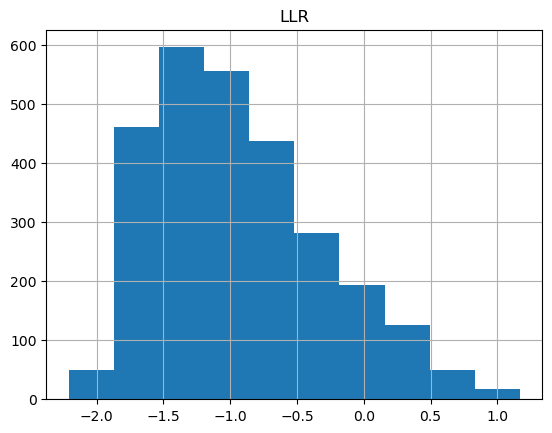

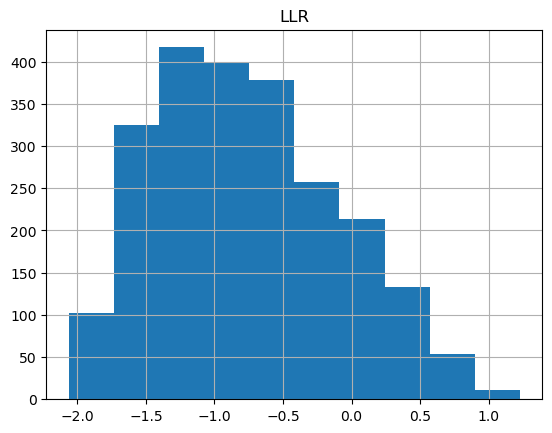

In [22]:
# Histogram of LLR for period 24:
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)])
    
circadian_2[0].hist(column='LLR')
circadian_2[1].hist(column='LLR')

array([[<Axes: title={'center': 'LLR'}>]], dtype=object)

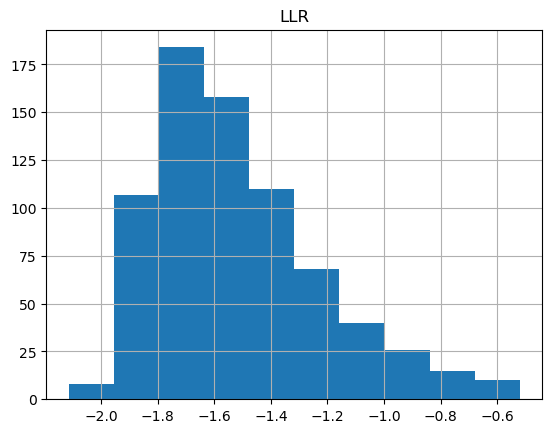

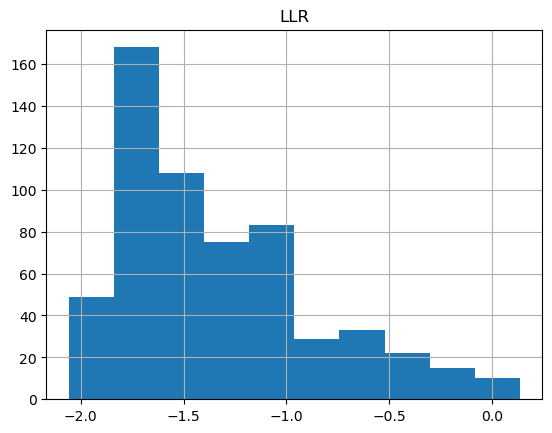

In [23]:
# Histogram of LLR for period 12:
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 12)])
    
circadian_2[0].hist(column='LLR')
circadian_2[1].hist(column='LLR')

In [24]:
JTK_WT = pd.read_csv('./JTK_results_Atlas/JTK_WT.csv')
JTK_WT = JTK_WT.iloc[:,1:]
JTK_KO = pd.read_csv('./JTK_results_Atlas/JTK_KO.csv')
JTK_KO = JTK_KO.iloc[:,1:]

In [25]:
KO

,Gene_ID,Period,SNR,nSNR,LLR,phase
0,Mrpl15,24.0,1.569912,0.560887,-1.668155,15
1,Lypla1,24.0,1.596597,0.541116,-1.682350,16
2,Tcea1,22.0,1.997521,0.858087,-1.770299,19
3,Atp6v1h,24.0,4.476249,1.629968,-1.431807,9
4,Rb1cc1,24.0,2.077423,0.577387,-1.596536,8
...,...,...,...,...,...,...
4661,ND4,22.0,1.166036,0.486124,-1.744044,17
4662,ND5,12.0,1.885303,0.942651,-1.578645,5
4663,ND6,24.0,5.074360,1.833290,-1.521386,6
4664,CYTB,24.0,1.290674,0.444653,-1.539997,14


In [26]:
# Check the acceptance p-values

Text(0.5, 1.0, 'LLR vs pvalues in KO')

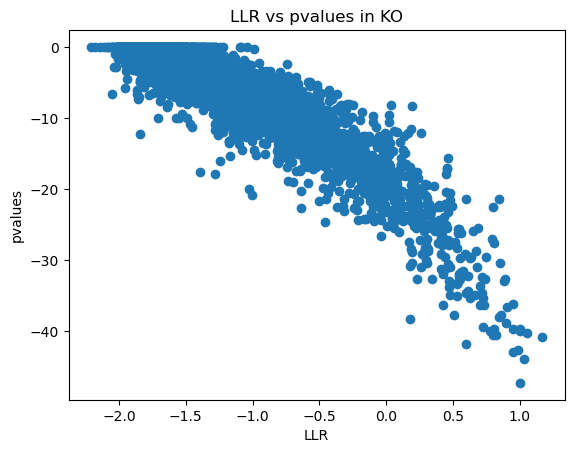

In [27]:
plt.scatter(x = KO['LLR'], y = np.log(JTK_KO['ADJ.P']))
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in KO')

Text(0.5, 1.0, 'LLR vs pvalues in WT')

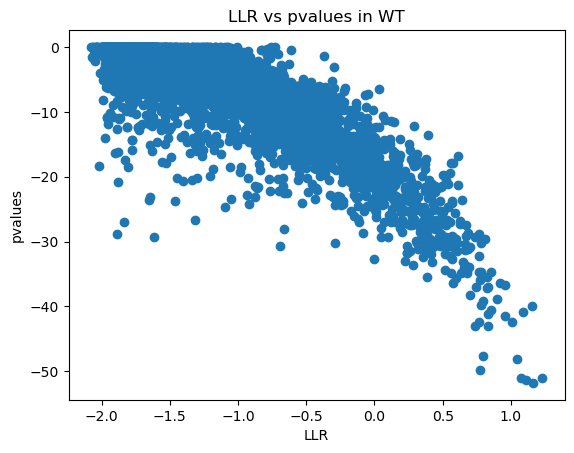

In [28]:
plt.scatter(x = WT['LLR'], y = np.log(JTK_WT['ADJ.P']))
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

-1.2943142255147295
-4.5716598032972815


Text(0.5, 1.0, 'LLR vs pvalues in KO')

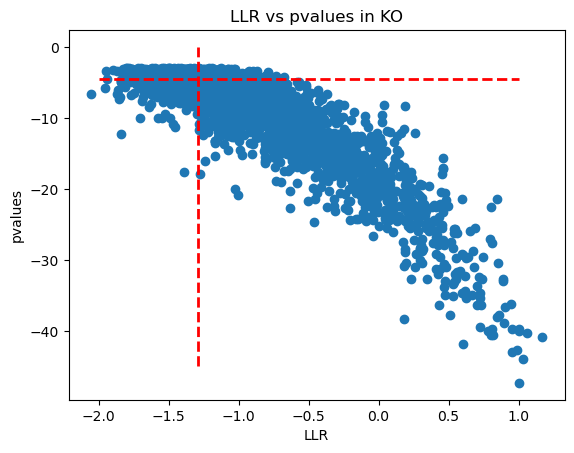

In [29]:
# Sort
refine = JTK_KO[JTK_KO['ADJ.P'] < 0.05]
llr = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x = llr[round(len(llr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 
print(thres_x)
print(np.log(thres_y))

plt.scatter(x = KO['LLR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=-2, xmax=1, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in KO')

-1.3660812377929688
-4.727255301950393


Text(0.5, 1.0, 'LLR vs pvalues in WT')

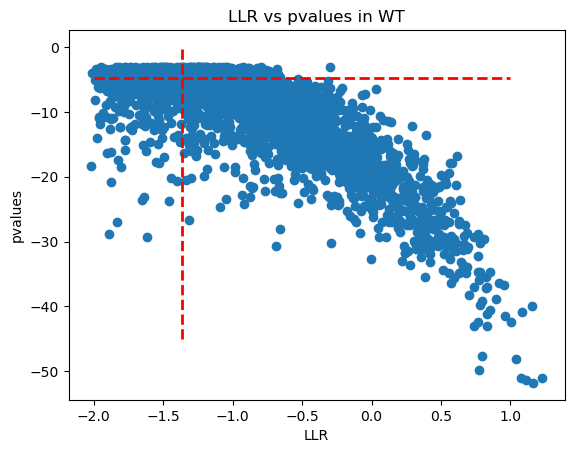

In [30]:
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
llr = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x = llr[round(len(llr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 

print(thres_x)
print(np.log(thres_y))

plt.scatter(x = WT['LLR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=-2, xmax=1, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

In [31]:
#sum(i > -14.61 for i in pval)
#round(len(pval)*80/100)